In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns

In [132]:
data = pd.read_csv('day.csv')

In [133]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [134]:
#No null or missing values in the columns
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

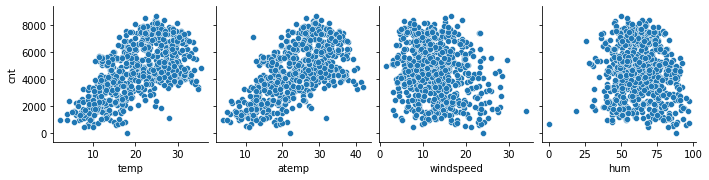

In [155]:
#columns - temp and atemp is indicating a linear plot while windspeed and hum doesn't but still we will keep them just in case our model finds some insights
sns.pairplot(data=data,x_vars=['temp','atemp','windspeed','hum'],y_vars='cnt')

In [136]:
#correlation of all the dependent cts variables with the target - cnt
data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


In [137]:
data.shape

(730, 16)

In [138]:
#Spring season has the least average number of rental bikes taken while Fall has the highest average
data.groupby('season')['cnt'].mean()

season
1    2608.411111
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [139]:
#2019 has significantly more number of people using rental bikes
data.groupby('yr')['cnt'].mean()

yr
0    3405.761644
1    5610.252055
Name: cnt, dtype: float64

In [140]:
#May-October seems to be the peak season for rental bikes which might be due to the pleasant weather at that time of the month
data.groupby('mnth')['cnt'].mean()

mnth
1     2176.338710
2     2669.964286
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

In [141]:
#Most of the days has simialr number. Day 0,1 is slightly lesser than the rest of the days
data.groupby('weekday')['cnt'].mean()

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4574.893204
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

In [142]:
#Clear weather has more number of people renting bikes while if there is light snow or rain, lesser people prefer rental bikes
data.groupby('weathersit')['cnt'].mean()

weathersit
1    4876.786177
2    4044.813008
3    1803.285714
Name: cnt, dtype: float64

In [143]:
#People might be commuting to office during non-holidays and therefore more people rent bikes on non-holidays
data.groupby('holiday')['cnt'].mean()

holiday
0    4530.90268
1    3735.00000
Name: cnt, dtype: float64

In [144]:
#Slightly more number of people use rental bikes on working days, might be to commute to offices
data.groupby('workingday')['cnt'].mean()

workingday
0    4330.168831
1    4590.332665
Name: cnt, dtype: float64

In [145]:
#dropping columns which don't provide any significant details on the target variable
data = data.drop(['instant','dteday'], axis = 1)

In [146]:
#one hot encoding for categorical columns - season, yr, mnth, weekday, weathersit, workingday, holiday
data = pd.get_dummies(data, columns = ['season','yr','mnth','weekday','weathersit','workingday','holiday'], prefix = ['season','yr','mnth','weekday','weathersit','workingday','holiday'])

In [147]:
data.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,workingday_0,workingday_1,holiday_0,holiday_1
0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,...,0,0,0,0,1,0,1,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,...,0,0,0,1,0,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,...,0,0,0,1,0,0,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,...,0,0,0,1,0,0,0,1,1,0


In [148]:
data.shape

(730, 39)

In [149]:
#columns - casual and registered are linearly dependent with cnt and therefore removed as these can't act as independent variables
y = data['cnt']
X = data.drop(['casual','registered','cnt'], axis = 1)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [151]:
#Linear Regression Model
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
r2_score(y_test, y_pred)

0.8622197210942277

In [152]:
#Decision Tree Model
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.8278483446064118

In [153]:
#Random Forest Model
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.9077159369329095

In [154]:
#Hence the Random Forest Regression model gives us the best R-Square value of 0.908